## imports

In [2]:
# untuk serialisasi dan deserialisasi objek Python.
%pip install pickle-mixin 
import pickle

import pandas as pd # untuk manipulasi dan analisis data

from sklearn.model_selection import train_test_split # untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.preprocessing import StandardScaler # untuk melakukan penskalaan fitur.

import tensorflow as tf # untuk machine learning dan neural network.
from tensorflow.keras.models import Sequential # untuk membuat model jaringan saraf secara berurutan.
from tensorflow.keras.layers import Dense # untuk menambahkan lapisan-lapisan dense (penuh terhubung) ke dalam model.

import matplotlib.pyplot as plt # untuk membuat visualisasi grafik.

Note: you may need to restart the kernel to use updated packages.


## Load dan preprocess data
source:https://www.kaggle.com/datasets/datasciencerikiakbar/new-year-hotel-rooms-availability-from-traveloka

In [3]:
df = pd.read_csv('data_hotel_traveloka.csv')

### memilih fitur yang relevan

In [4]:
data_model = df[['city','name','displayName','region','longitude', 'latitude', 'userRating']]

### Rescale kolom ratings menjadi antara 1 dan 5

In [5]:
data_model['userRating'] = data_model['userRating'].apply(lambda x: round(x/2) if x <= 10 else 5)

C:\Users\HP\AppData\Local\Temp\ipykernel_19204\1770360470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['userRating'] = data_model['userRating'].apply(lambda x: round(x/2) if x <= 10 else 5)


### mengurus data duplicates dan data yang hilang (missing data)

In [6]:
data_model.drop_duplicates(inplace=True)
data_model.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19204\1146742051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop_duplicates(inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_19204\1146742051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.dropna(inplace=True)


### memisah (Split) data menjadi fitur(input) and target(output)

In [7]:
X = data_model[['longitude', 'latitude']]
y = data_model['userRating']

### konversi y menjadi data kategorikal

In [8]:
y = tf.keras.utils.to_categorical(y-1, num_classes=5)

### memisah (Split) data menjadi himpunan train, test, and validation (50% train, 20% validation, 30% test)

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.2/0.7), random_state=42)

### penskalaan features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## permodelan

### membangun neural network model

In [11]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes

### Compile model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### melatih model

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 2s 90ms/step - loss: 1.6270 - accuracy: 0.0085 - val_loss: 1.5778 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 1.5562 - accuracy: 0.0812 - val_loss: 1.5148 - val_accuracy: 0.2947
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 1.5012 - accuracy: 0.6282 - val_loss: 1.4682 - val_accuracy: 0.9895
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 1.4597 - accuracy: 0.9658 - val_loss: 1.4289 - val_accuracy: 0.9895
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 1.4226 - accuracy: 0.9658 - val_loss: 1.3878 - val_accuracy: 0.9895
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 1.3807 - accuracy: 0.9658 - val_loss: 1.3385 - val_accuracy: 0.9895
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 1.3275 - accuracy: 0.9658 - val_loss: 1.2639 - val_accuracy: 0.9895
Epoch 8/100
8/8 

### mengevaluasi model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9718


### print hasil dari pelatihan

In [15]:
print('Train Accuracy: ', max(history.history['accuracy']))
print('Validation Accuracy: ', max(history.history['val_accuracy']))
print('Train Loss: ', min(history.history['loss']))
print('Validation Loss: ', min(history.history['val_loss']))

Train Accuracy:  0.9658119678497314
Validation Accuracy:  0.9894737005233765
Train Loss:  0.15188539028167725
Validation Loss:  0.07552248239517212


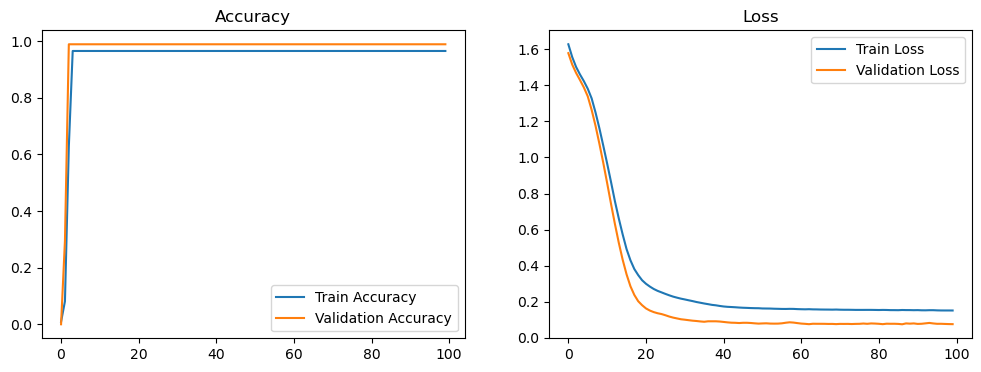

In [18]:
# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## menyimpan model

### Save model dan scaler-nya

In [16]:
model.save('data_hotel.h5')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Save data-nya

In [17]:
data_model.to_csv('processed_data_hotel.csv', index=False)